# Hyperbolic secant distributionのパラメータ推定
+ モデル
    $p(x|w) = \prod_{j=1}^M \frac{\sqrt{s_j}}{2\pi} \frac{1}{\cosh(\sqrt{s_j}\frac{x_j-b_j}{2})}$,  
    $x,b \in \mathbb{R}^M, s \in \mathbb{R_+}^M, w = \{(b_j, s_j)\}_{j=1}^M$
+ 事前分布$\varphi(w)$
    + $\varphi(w) = N(b|0, 1/(s\beta))Gam(s|\gamma, \delta)$
    + $\beta, \gamma, \delta \in \mathbb{R}_+$
+ アルゴリズム
    + 局所変分近似で近似事後分布を作成する, 以下のアルゴリズムで計算可能
    

1. $h_i(\xi) \in \mathbb{R}^M$を初期化$(i = 1, ..., n)$
2. $v_i(\xi) = -\frac{\tanh(\sqrt{h_i(\xi)}/2)}{4\sqrt{h_i(\xi)}}$を計算する
3. 以下の更新を行う:
    + $\hat{\beta} = \sum_{i=1}^n -2v_i(\xi) + \beta$
    + $\hat{m} = \frac{1}{\hat{\beta}}\sum_{i=1}^n -2v_i(\xi)x_i$
    + $\hat{\gamma} = n/2 + \gamma$
    + $\hat{\delta} = \delta + \sum_{i=1}^n -v_i(\xi)x_i^2 - \frac{1}{2}\hat{\beta}\hat{m}^2$
4. 以下の更新を行う:
    + $h_i(\xi) = \frac{\hat{\gamma}}{\hat{\delta}} (x_i - \hat{m})^2 + \frac{1}{\hat{\beta}}$
    + $v_i(\xi) = -\frac{\tanh(\sqrt{h_i(\xi)}/2)}{4\sqrt{h_i(\xi)}}$
5. 3.に戻る


+ 方針
    + とりあえず、M=1の場合の推定を行う。

In [1]:
%matplotlib inline

In [27]:
import numpy as np
from scipy.special import gammaln
import matplotlib.pyplot as plt
import seaborn as sns

## hyperbolic secant distributionに従う乱数を生成する
$Y \sim standard_cauchy(x)$の時,  
$X = \frac{2}{s}\sinh^{-1}(Y) + b$は,  
$X \sim p(x) = \frac{s}{2\pi}\frac{1}{\cosh(s(x-b)/2)}$に従うはずなので、その確認を行う

In [3]:
data_seed = 20190505
n = 2000
true_s = 3
true_b = 0
np.random.seed(data_seed)

In [4]:
Y = np.random.standard_cauchy(size=n)
X = 2/np.sqrt(true_s)*np.arcsinh(Y) + true_b

In [5]:
x_range = np.linspace(X.min(), X.max(), num=4000)
true_density = np.sqrt(true_s)/(2*np.pi)/(np.cosh(np.sqrt(true_s)*(x_range - true_b)/2))

C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


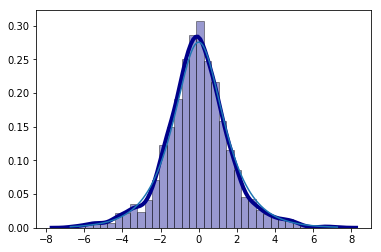

In [6]:
sns.distplot(X, hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.plot(x_range, true_density)
plt.show()

## 学習を行う

In [28]:
### 学習方法の設定
iteration = 1000
learning_seed = 20190508

pri_beta = 0.001
pri_delta = 1
pri_gamma = 1

energy = np.zeros(iteration)

np.random.seed(learning_seed)

In [29]:
### 学習を行う

### 1. 初期化
est_h_xi = np.random.gamma(shape=2, size = n)
est_v_xi = -np.tanh(np.sqrt(est_h_xi)/2)/(4*np.sqrt(est_h_xi))


In [30]:
### 学習の繰り返し
for ite in range(iteration):
    ### 2. 事後分布の更新
    est_beta = -2*est_v_xi.sum() + pri_beta
    est_m = (-2*est_v_xi * X).sum() / est_beta
    est_gamma = n/2 + pri_gamma
    est_delta = pri_delta - (est_v_xi * X**2).sum() - est_beta * est_m**2/2
    
    ### 3. 補助変数の更新
    est_h_xi = est_gamma / est_delta * (X - est_m)**2 + 1/est_beta
    est_v_xi = -np.tanh(np.sqrt(est_h_xi)/2)/(4*np.sqrt(est_h_xi))
    
    energy[ite] = n*np.log(2*np.pi) + np.log(np.cosh(np.sqrt(est_h_xi)/2)).sum() + (est_h_xi * est_v_xi).sum()
    energy[ite] += np.log(est_beta / pri_beta)/2 + est_gamma * np.log(est_delta) - pri_gamma * np.log(pri_delta) - gammaln(est_gamma) + gammaln(pri_gamma)
    print(energy[ite])

4415.840671476703
4041.1622713358406
3926.5713095251813
3886.383613898266
3871.527670280334
3865.922410580794
3863.7907525100304
3862.9776340279873
3862.6671111930564
3862.548472580945
3862.5031376942434
3862.4858129232607
3862.4791920763455
3862.4766618231506
3862.4756948459594
3862.4753252992978
3862.4751840706695
3862.475130097685
3862.475109470959
3862.475101588091
3862.4750985755118
3862.4750974242024
3862.47509698421
3862.4750968160565
3862.475096751795
3862.4750967272353
3862.4750967178506
3862.475096714263
3862.4750967128934
3862.4750967123678
3862.475096712168
3862.475096712091
3862.4750967120626
3862.4750967120517
3862.4750967120463
3862.475096712045
3862.4750967120444
3862.475096712044
3862.475096712043
3862.475096712043
3862.475096712043
3862.475096712043
3862.475096712043
3862.475096712043
3862.475096712043
3862.475096712043
3862.475096712043
3862.475096712043
3862.475096712043
3862.475096712043
3862.475096712043
3862.475096712043
3862.475096712043
3862.475096712043
3862.4

In [25]:
est_b = est_m
est_s = est_gamma / est_delta
{
    "est_b": est_b,
    "est_s": est_s
}

{'est_b': -0.07537625240901195, 'est_s': 3.3572953746723067}